In [2]:
import pandas as pd
import numpy as np

GDP = np.array([43151647003, 57123671734, 81003884545, 1.0485E+11, 1.33442E+11, 1.15309E+11, 
                1.48047E+11, 1.92627E+11, 2.07999E+11, 2.36635E+11, 2.21416E+11, 1.84388E+11, 
                1.37278E+11, 1.66806E+11, 1.7934E+11, 1.81667E+11, 1.71082E+11, 1.97112E+11, 
                2.20495E+11])

inflation_rate = np.array([0.0688, 0.0758, 0.0872, 0.1085, 0.1714, 0.0732, 0.074, 0.0842, 
                           0.051, 0.0585, 0.0671, 0.0667, 0.1455, 0.0744, 0.0602, 0.0525, 
                           0.0675, 0.08, 0.203])

production = np.array([2.647203315, 2.833078056, 2.924707228, 3.040792351, 3.01696266, 
                       3.244222215, 3.394558458, 3.45714065, 3.392932546, 3.499920042, 
                       3.629783129, 3.692041199, 3.584883791, 3.964865605, 4.149895762, 
                       4.150441347, 3.933291107, 3.930674581, 4.250786348])

consumption = np.array([0.384390744, 0.416543317, 0.43681608, 0.466726143, 0.53680021, 
                        0.407592473, 0.478710469, 0.553139883, 0.502244584, 0.507464084, 
                        0.504762304, 0.641371174, 0.68114193, 0.680664787, 0.641846461, 
                        0.626333032, 0.577749817, 0.581853434, 0.672511896])

oil_prices = np.array([43.36, 61.06, 60.85, 95.95, 44.6, 79.39, 91.38,
                       98.83, 91.83, 98.17, 53.45, 37.13, 53.75, 60.46,
                       45.15, 61.14, 48.52, 75.21, 80.51])

data = {
    'GDP': GDP,
    'Inflation Rate': inflation_rate,
    'Production': production,
    'Consumption': consumption,
    'Oil Prices': oil_prices
}

df = pd.DataFrame(data)
print(df)


             GDP  Inflation Rate  Production  Consumption  Oil Prices
0   4.315165e+10          0.0688    2.647203     0.384391       43.36
1   5.712367e+10          0.0758    2.833078     0.416543       61.06
2   8.100388e+10          0.0872    2.924707     0.436816       60.85
3   1.048500e+11          0.1085    3.040792     0.466726       95.95
4   1.334420e+11          0.1714    3.016963     0.536800       44.60
5   1.153090e+11          0.0732    3.244222     0.407592       79.39
6   1.480470e+11          0.0740    3.394558     0.478710       91.38
7   1.926270e+11          0.0842    3.457141     0.553140       98.83
8   2.079990e+11          0.0510    3.392933     0.502245       91.83
9   2.366350e+11          0.0585    3.499920     0.507464       98.17
10  2.214160e+11          0.0671    3.629783     0.504762       53.45
11  1.843880e+11          0.0667    3.692041     0.641371       37.13
12  1.372780e+11          0.1455    3.584884     0.681142       53.75
13  1.668060e+11    

In [4]:
revenue_str = '63741.093 63773.638 75227.5234 94993.8047 118815.089 126181.133 138240.94 140478.092 143061.325 190021.672 206637.113 213161.762 207107.815 222449.954 225399.57 239625.95 235222.082 238176.116 255627.309'
revenue_list = revenue_str.split()
revenue = np.array([float(r) for r in revenue_list])

data['Revenue'] = revenue

new_df = pd.DataFrame(data)
print(new_df)

             GDP  Inflation Rate  Production  Consumption  Oil Prices  \
0   4.315165e+10          0.0688    2.647203     0.384391       43.36   
1   5.712367e+10          0.0758    2.833078     0.416543       61.06   
2   8.100388e+10          0.0872    2.924707     0.436816       60.85   
3   1.048500e+11          0.1085    3.040792     0.466726       95.95   
4   1.334420e+11          0.1714    3.016963     0.536800       44.60   
5   1.153090e+11          0.0732    3.244222     0.407592       79.39   
6   1.480470e+11          0.0740    3.394558     0.478710       91.38   
7   1.926270e+11          0.0842    3.457141     0.553140       98.83   
8   2.079990e+11          0.0510    3.392933     0.502245       91.83   
9   2.366350e+11          0.0585    3.499920     0.507464       98.17   
10  2.214160e+11          0.0671    3.629783     0.504762       53.45   
11  1.843880e+11          0.0667    3.692041     0.641371       37.13   
12  1.372780e+11          0.1455    3.584884     0.

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Extracting independent and dependent variables
X = new_df.drop('Revenue', axis=1)
y = new_df['Revenue']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scaling the independent variables
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Creating the parameter grid for the grid search
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Creating the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Performing the grid search with RMSE as the scoring metric
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

# Fitting the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")



Best hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [7]:
# Creating a new RandomForestRegressor model with the best hyperparameters
best_rf = RandomForestRegressor(**best_params, random_state=1)

# Fitting the model to the training data
best_rf.fit(X_train_scaled, y_train)

# Making predictions on the test data
y_pred = best_rf.predict(X_test_scaled)

# Calculating the RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")


Root Mean Squared Error: 12064.22


---

In [12]:
import pandas as pd
def predict_revenue(gdp, inflation_rate, production, consumption, oil_price):
    # Create a DataFrame from the input values
    input_data = pd.DataFrame({
        'GDP': [gdp],
        'Inflation Rate': [inflation_rate],
        'Production': [production],
        'Consumption': [consumption],
        'Oil Prices': [oil_price]
    })

    # Scale the input data using the same scaler used for training data
    input_data_scaled = scaler.transform(input_data)

    # Make the prediction using the best_rf model
    predicted_revenue = best_rf.predict(input_data_scaled)[0]

    return predicted_revenue


In [10]:
gdp =  133442000000.0
inflation_rate =  0.1377
production = 4.69622423224376
consumption = 0.7735
oil_price = 65.39135395
predicted_revenue = predict_revenue(gdp, inflation_rate, production, consumption, oil_price)
print(f"Predicted Revenue: {predicted_revenue:.2f}")

Predicted Revenue: 228520.07


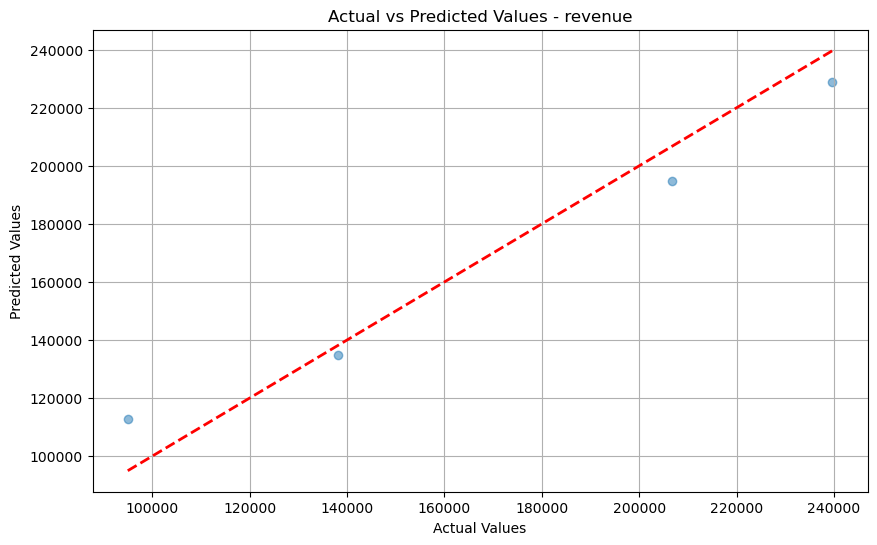

In [14]:
import matplotlib.pyplot as plt

# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - revenue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.grid(True)
plt.show()

